In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [24]:
p1 = Path.cwd() / 'data'

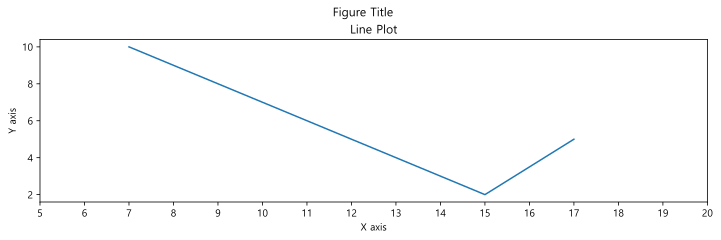

In [7]:
x = [-3, 5, 7]
y = [10, 2, 5]
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(x, y)
ax.set_xlim(-5, 10)
ax.set_ylabel('Y axis')
ax.set_xlabel('X axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', y=1.03)
ax.set_xticks(range(-5, 11), labels=range(5, 21))
plt.show()

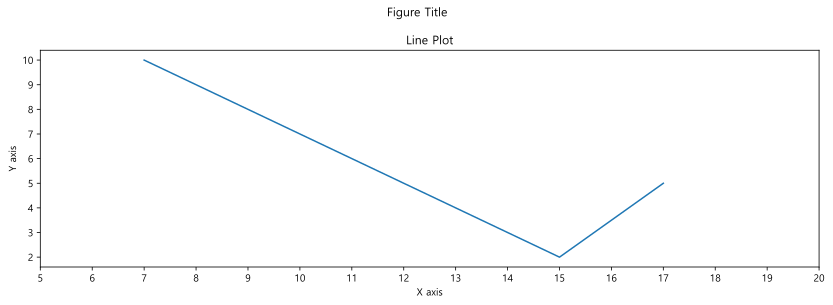

In [9]:
fig.get_size_inches()
fig.set_size_inches(14, 4)
fig

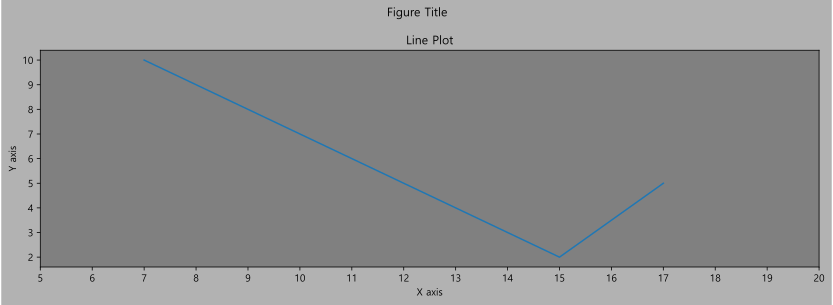

In [11]:
fig.set_facecolor('0.7')
ax.set_facecolor('0.5')
fig

In [12]:
ax.get_children()

 Text(0.5, 1.0, 'Line Plot'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

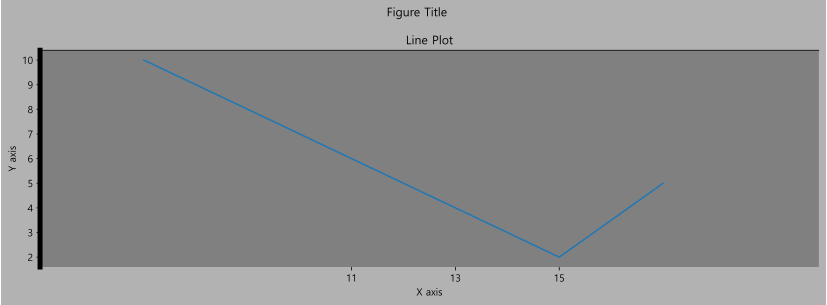

In [19]:
spines = ax.spines
spines['left'].set_linewidth(5)
spines['right'].set_linewidth(0)
spines['bottom'].set_visible(False)
ax.xaxis.set_ticks([1, 3, 5])
fig

In [21]:
fig.get_facecolor()

(0.7, 0.7, 0.7, 1.0)

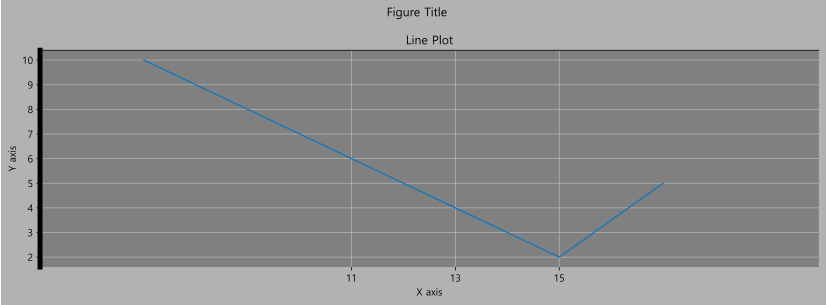

In [23]:
ax.grid(visible=True, axis='both')
fig

In [25]:
alta = pd.read_csv(p1 / 'alta-noaa-1980-2019.csv', parse_dates=['DATE'], index_col='DATE')
alta.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-01,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.10,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.43,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.09,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.00,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data = alta.loc['2018-09':'2019-08']['SNWD'].interpolate(limit_direction='both')
data

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64

In [39]:
blue = '#99ddee'
white = '#ffffff'

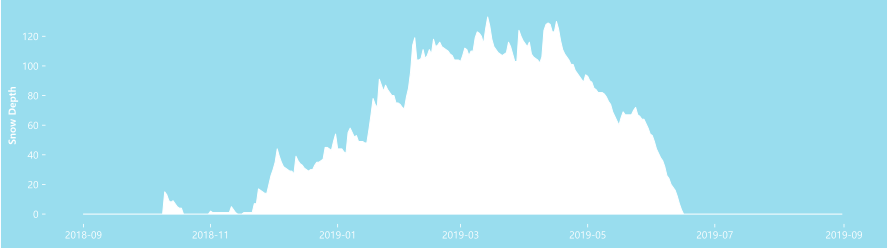

In [40]:
fig, ax = plt.subplots(figsize=(15, 4), linewidth=5, facecolor=blue)
ax.set_facecolor(blue)
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', colors=white)
ax.set_ylabel('Snow Depth', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white)
plt.show()